<h1><center> Laboratorio di WebScraping </h1>
<h1><center> Anno Accademico 2024-2025 </h1>
<h1><center>  Docente: Laura Ricci </h1>
<h1><center> Lezione 9 </h1>  
<h1><center>  Pandas: Gestione di NaN </h1>
<h1><center> Ottimizzazione della memoria e del tempo di esecuzione </h1>
<h1><center> 28 Febbraio 2025 
<h1><center> 

## Valori nulli nel DataFrame: perchè sono un problema?

In [2]:
import matplotlib.pyplot as plt
import numpy as np
# Sample data with NaN values
data = [np.random.normal(0, std, 10).tolist() for std in range(1, 4)]
data[1][10:15] = [np.nan] * 5  
# Introduco NaN nel secondo gruppo
data[1]


[-3.2107855220729427,
 -1.9389010386156866,
 0.07974897924620775,
 -0.10548910237067682,
 1.0026065512197522,
 1.7267232583813352,
 0.7739826085426192,
 -1.7148357057769947,
 1.254392942913976,
 0.40844344243344216,
 nan,
 nan,
 nan,
 nan,
 nan]

## Valori nulli nel DataFrame: perchè sono un problema?

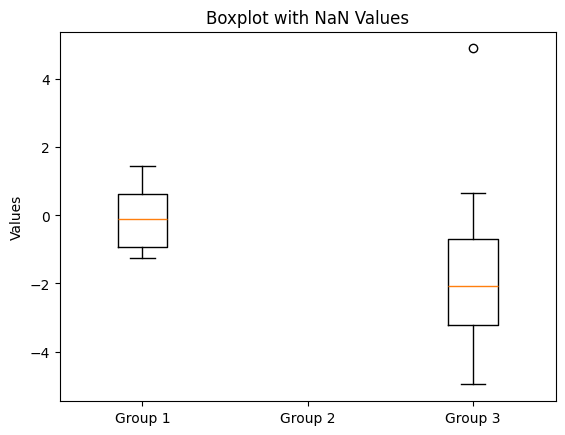

In [3]:
plt.boxplot(data)
plt.title('Boxplot with NaN Values')
plt.ylabel('Values')
plt.xticks([1, 2, 3],['Group 1', 'Group 2', 'Group 3'])
plt.show()

## Come gestire i valori nulli del DataSet

* come individuo se nel datset collegato nel **DataFrame** ho dei valori nulli?
    * diversi metodi per individuare e contare i valori nulli
* come tratto i valori nulli?
    * rimozione
    * lasciare inalterati
    * sostituire il valore nullo con un altro valore

## DataFrame: gestire i valori nulli

In [4]:
import numpy as np
import pandas as pd
df = pd.DataFrame([[np.nan, 2, np.nan, 0],
                   [3, 4, np.nan, 1],
                   [np.nan, np.nan, np.nan, 5],
                   [np.nan, 3, np.nan, 4]],
                   columns=list('ABCD'))
df

,A,B,C,D
0,NaN,2.0,NaN,0
1,3.0,4.0,NaN,1
2,NaN,NaN,NaN,5
3,NaN,3.0,NaN,4


## DataFrame: Individuazione dei valori nulli

In [5]:
df.isnull()

,A,B,C,D
0,True,False,True,False
1,False,False,True,False
2,True,True,True,False
3,True,False,True,False


* restituisce un **DataFrame**  di valori **Booleani**
* per ogni posizione del **DataFrame** originario, un valore booleano che indica se il valore corrispondente è **NaN**

## DataFrame: visualizzare i valori nulli con seaborn

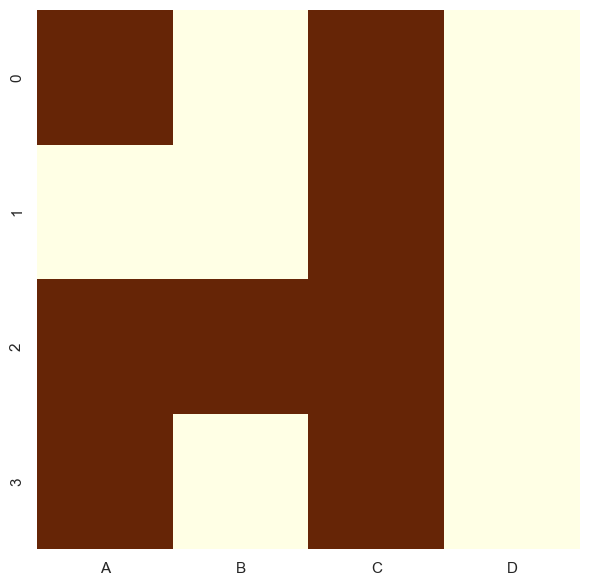

In [6]:
import seaborn as sns
sns.set(rc={'figure.figsize':(7, 7)})
sns.heatmap(df.isnull(), cmap='YlOrBr', cbar=False);


## DataFrame: visualizzare i valori nulli con seaborn

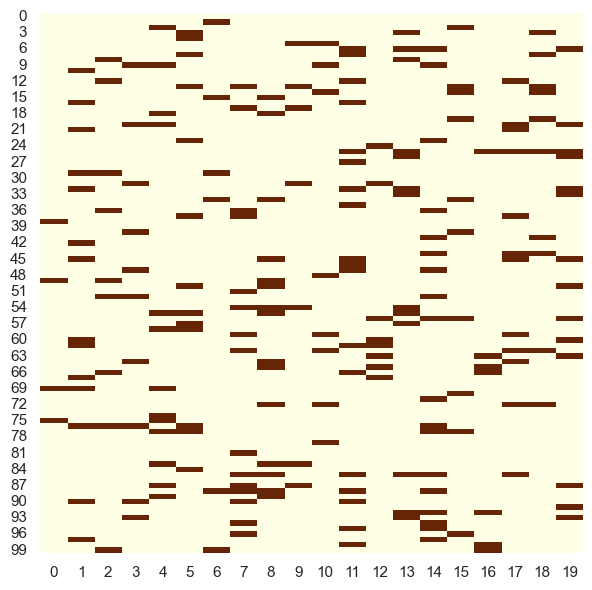

In [7]:
# Generazione di un DatFrame più grande
np.random.seed(2020)
npx = np.zeros((100,20))
mask = np.random.choice([True, False], npx.shape, p=[.1, .9])
npx[mask] = np.nan
sns.heatmap(pd.DataFrame(npx).isnull(), cmap='YlOrBr', cbar=False);


## DataFrame: identificazione dei  valori nulli

In [8]:
import pandas as pd
df_cycling = pd.read_csv("DataSets/cycling_data.csv", parse_dates=True)
df_cycling

,Date,Name,Type,Time,Distance,Comments
0,"10 Sep 2019, 00:13:04",Afternoon Ride,Ride,2084,12.62,Rain
1,"10 Sep 2019, 13:52:18",Morning Ride,Ride,2531,13.03,rain
2,"11 Sep 2019, 00:23:50",Afternoon Ride,Ride,1863,12.52,Wet road but nice weather
3,"11 Sep 2019, 14:06:19",Morning Ride,Ride,2192,12.84,Stopped for photo of sunrise
4,"12 Sep 2019, 00:28:05",Afternoon Ride,Ride,1891,12.48,Tired by the end of the week
5,"16 Sep 2019, 13:57:48",Morning Ride,Ride,2272,12.45,Rested after the weekend!
6,"17 Sep 2019, 00:15:47",Afternoon Ride,Ride,1973,12.45,Legs feeling strong!
7,"17 Sep 2019, 13:43:34",Morning Ride,Ride,2285,12.60,Raining
8,"18 Sep 2019, 13:49:53",Morning Ride,Ride,2903,14.57,Raining today
9,"18 Sep 2019, 00:15:52",Afternoon Ride,Ride,2101,12.48,Pumped up tires


## DataFrame: identificazione dei  valori nulli

In [9]:
df_cycling.columns[df_cycling.isnull().sum()>0]

Index(['Distance'], dtype='object')

* quali sono le colonne che contengono valori nulli?

In [10]:
df_cycling.isnull().sum()

Date        0
Name        0
Type        0
Time        0
Distance    2
Comments    0
dtype: int64

* quanti valori **NaN** ci sono in ogni colonna?

## Gestione dei valori nulli: rimozione

In [11]:
df

,A,B,C,D
0,NaN,2.0,NaN,0
1,3.0,4.0,NaN,1
2,NaN,NaN,NaN,5
3,NaN,3.0,NaN,4


In [12]:
df.dropna(axis=1)

,D
0,0
1,1
2,5
3,4


## Gestione dei valori nulli: sostituzione

In [13]:
df.fillna(0)  

,A,B,C,D
0,0.0,2.0,0.0,0
1,3.0,4.0,0.0,1
2,0.0,0.0,0.0,5
3,0.0,3.0,0.0,4


## Gestione  dei valori nulli: valori stimati

In [27]:
df.fillna(df.mean()) 

,A,B,C,D
0,3.0,2.0,NaN,0
1,3.0,4.0,NaN,1
2,3.0,3.0,NaN,5
3,3.0,3.0,NaN,4


In [ ]:
df

## Gestione dei valori nulli: forwardfill

In [28]:
df

,A,B,C,D
0,NaN,2.0,NaN,0
1,3.0,4.0,NaN,1
2,NaN,NaN,NaN,5
3,NaN,3.0,NaN,4


In [29]:
df.ffill()

,A,B,C,D
0,NaN,2.0,NaN,0
1,3.0,4.0,NaN,1
2,3.0,4.0,NaN,5
3,3.0,3.0,NaN,4


* propaga **in avanti** l'ultimo valore non nullo incontrato


## Gestione dei valori nulli: backwardfill

In [ ]:
df

In [ ]:
df.bfill()

* propaga **in indietro** l'ultimo valore non nullo incontrato

## Gestione dei valori nulli: interpolazione

In [ ]:
df

In [ ]:
# interpolazione lineare dei valori nulli
df_interpolated = df.interpolate()
df_interpolated

* interpolazione in base al valore dei vicini
* tecniche più sofisticate utilizzano **machine learning**, tramite **scikit-learn**

## Il Dataset Titanic

* considerare il dataset **titanic3.xls** (file **Excel**)
* determinare quali colonne contengono valori nulli
* per ogni colonna che contiene valori nulli, decidere se è meglio eliminare il valore o sostituirlo con un altro valore

In [ ]:
import pandas as pd
df_titanic=pd.read_excel('DataSets/titanic3.xls')
print(df_titanic.columns.values)

## Il Dataset Titanic

In [ ]:
df_titanic

## Il Dataset Titanic

In [ ]:
df_titanic['survived'].mean()

In [ ]:
print('Dati Sopravvissuti per Genere')
print(df_titanic['survived'].groupby(df_titanic['sex']).mean())
print('\n\nPercentuale passeggeri per Genere')
print(df_titanic['sex'].value_counts(normalize=True))

## Il Dataset Titanic

* **cut** utilizzato per segmentare dati in **bins**
* utile per passare da una variabile continua a una variabile **categoriale**

In [ ]:
df_titanic['survived'].groupby(pd.cut(df_titanic['age'], 25),observed=True).mean().plot(kind='bar',colormap='viridis')

## Il Dataset Titanic

In [ ]:
df_titanic['survived'].groupby(pd.cut(df_titanic['fare'], [0,5,10,20,40,70,100,1000]),observed=True).mean().plot(kind='bar',colormap='autumn')

## Il Dataset Titanic

In [ ]:
df_titanic['survived'].groupby(df_titanic['pclass']).mean().plot(kind='bar',colormap='cool')

## Il Dataset Titanic: valori NaN

* cosa fare con i valori **NaN** contenuti nelle colonne?
* dipende da molti fattori
    * il tipo dei dati nella colonna
    * il numero di righe che presentano valori nulli
    * la relazione esistente tra i dati presenti nel dataset: c'è una relazione tra i valori contenuti nelle 
    righe? Eliminando una riga influenza anche altre righe del dataset?

## Il Dataset Titanic: valori NaN

In [ ]:
df_titanic.columns[df_titanic.isnull().sum()>0]


In [ ]:
df_titanic.isnull().sum()

## Il Dataset Titanic: valori NaN

* le colonne **fare** e **enbarket** contengono rispettivamente **1** e **2** valori non nulli
* in presenza di pochi valori nulli si possono eliminare le righe corrispondenti
* eliminiamo queste righe

In [ ]:
df_titanic= df_titanic.dropna(subset=['fare', 'embarked'])
df_titanic.isnull().sum()

## Il Dataset Titanic: valori NaN

* la colonna **age** contiene molti valori nulli
* possibile sostituire ai valori nulli con
    * **media**: scelta arbitraria, però i valori sostituiti non cambiano la media dei valori non nulli, tuttavia si riduce la deviazione standard.
    * **moda**
    * calcolare la distribuzione delle età dei passeggeri del Titanic e scegliere un valore random da quella distribuzione

## Il Dataset Titanic: valori NaN

* sostituzione dei valori nulli dell'età con la **media**

In [ ]:
pd.options.mode.copy_on_write = True
df_titanic['age']=df_titanic['age'].fillna(df_titanic['age'].mean())
df_titanic.isnull().sum()


* **df.mean()**: ignora per default  valori **NaN**

## Il Dataset Titanic: valori NaN

* anche la colonna **home.dest** contiene molti valori nulli
* in questo caso si possono sostituire i **valori nulli** con la **moda**, ovvero il valore più comune
    * un passeggero va dove la maggior parte degli altri passeggeri vanno
    * molte soluzioni più sofisticate: scegliere la moda delle destinazioni dei passeggeri imbarcati dallo stesso posto
    

In [ ]:
#pd.options.mode.copy_on_write = True
df_titanic['home.dest']=df_titanic['home.dest'].fillna(df_titanic['home.dest'].mode())
df_new.isnull().sum()

## PANDAS: memory model

* il modello di memoria di **Pandas** ha origine da quello di **numpy**, ma verrà modificato a partire dalla versione **3.0**  e dalle versione **2.0** sarà possibile scegliere il nuovo modello
* numpy
    * quando si crea un nuovo array a partire da uno esistente, il nuovo è  **una vista** sull'array originario
    * ogni modifica effettuta sull'array originario  si ripercuote sulla vista e viceversa
* in **PANDAS**, il comportamento è simile
    * infatti **Series** e **DataFrame** sono **"backed"** da un array numpy


In [ ]:
import pandas as pd
print(pd.__version__)


## PANDAS: memory model

* senza l'opzione **CopyOnWrite** il comportamento di **Pandas** è molto difficile da prevedere
    * alcune operazioni **Pandas** restituiscono una **copia** della struttura dati, altre una **view**
* se un **oggetto A** è la copia di un **oggetto B** allora ognuno fa riferimento ad una zona di memoria diversa
    * quando  modifico la copia non modifico il dato originario
* se un **oggetto A** è una **view** dell'oggetto **B**, allora condividono la stessa zona di memoria
    * ogni modifica a  **A** o a **B** ha effetti sull'altro arraye
* ogni soluzione presenta degli svantaggi:
    * **view**: possibilità di effetti laterali non desiderati nel codice
    * **copia**: **bassa efficienza** se si lavora con **DataSet** grandi, è possibile che non si voglia





## DataFrame: copy or view?

In [ ]:
import pandas as pd
# Questa è l'opzione di default
pd.set_option("mode.copy_on_write", False)
df = pd.DataFrame({"a": [10, 20, 30, 40], "b": [11, 12, 13, 14]})
df


In [ ]:
my_slice = df.iloc[1:3,]
my_slice


## DataFrame: copy or view?

In [ ]:
df.iloc[1, 1] = -1
df

In [ ]:
my_slice

* l'esecuzione del programma ha prodotto una **view** sul DataFrame originario
* i due **DataFrame** condividono lo stesso spazio di memoria


## DataFrame: copia esplicita

In [ ]:
df = pd.DataFrame({"a": [10, 20, 30, 40], "b": [11, 12, 13, 14]})
my_slice = df.iloc[1:3,].copy()
my_slice


In [ ]:
df.iloc[1, 1] = -1
df


In [ ]:
my_slice


## DataFrame: Copy on Write (CoW)

* le **views** sono un meccanismo che consentono di migliorare l'uso della memoria
* i **DataFrame** sono oggetti di dimensione elevata, quindi fare delle copie costa molto, in termini di **memory consumption**
* le regole di **Panda** non sono chiare, ed il comportamento del programma può risultare non predicibile
* la soluzione che verrà adottata a partire da **Pandas 3.0** sarà la **Copy on Write**
    * cerca di ottenere allo stesso tempo un buon **memory usage** e una **semantica chiara**
* dal punto di vista dell'utente
    * Pandas si comporta cone tutte le operazioni su un **DataFrame** restituissero una **copia**
* dal punto di vista della implementazione
    * **Pandas** non genera **effettivamente** una copia 
    * si crea una **view** e solo se viene apportata una modifica ad uno dei due **DataFrame**, viene allora effettata una **copia**
    

## DataFrame: Copy on Write (CoW)

In [ ]:
import pandas as pd
# settare l'opzione copy_on_write
pd.set_option("mode.copy_on_write", True)
df = pd.DataFrame({"a": [10, 20, 30, 40], "b": [11, 12, 13, 14]})
df

In [ ]:
my_slice = df.iloc[1:3,]
my_slice


## DataFrame: Copy on Write (CoW)

In [ ]:
df.iloc[1, 1] = -1
df


In [ ]:
my_slice


## Ridurre l'uso della RAM in Pandas: scegliere i tipi

* primo, semplice,  accorgimento: utilizzare tipi che richiedano poca memoria
* valori numerici
    * **Pandas** per default memorizza i valori interi come **int64** e i valori decimali come **float64**
* **Downcasting**
    * memorizzare **int64** come **int16** o **int8**
    * memorizzare **float64** come **float16** o **float8**
* utilizzando la funzione **astype**    

## Profilare la memoria in Pandas

In [ ]:
import pandas as pd
athletes = pd.read_csv('DataSets/athlete_events.csv')
athletes

## Profilare la memoria in Pandas: df.memory_usage()

In [ ]:
athletes.info()

## Profilare la memoria in Pandas: df.memory_usage()

In [ ]:
athletes.memory_usage(deep=True)

## Profilare la memoria in Pandas: df.memory_usage()

In [ ]:
athletes.memory_usage(deep=True).sum()

* **deep=True** è fondamentale: se omesso Pandas ignora la dimensione di ogni oggetto Python contenuto nel DataFrame, 
quindi di tutte le stringhe che sono considerate **Object**
* dimensioni in **bytes**
* la funzione **memory_usage** può essere utilizzata per calcolare la dimensione di un **DataFrame** o di una **Series**

## Profilare la memoria in Pandas

* il **DataFrame** occupa circa **166 Mb**


In [ ]:
athletes.memory_usage(deep=True).sort_values()


* la maggior parte della memoria è occupata da dati di tipo **String**

## Caricare solo le colonne necessarie: *usecols*

In [ ]:
athletes_reduced = pd.read_csv('DataSets/athlete_events.csv', usecols=['NOC', 'Medal'])
athletes_reduced.info(memory_usage='deep')


## Ridurre la dimensione delle stringhe nel DataFrame: category

* utilizzare il **category**, uno speciale tipo di dato in cui:
    * ogni valore di tipo **String** diverso viene memorizzato una singola volta
    * tutti i successivi riferimenti puntano al valore memorizzato
* trasformazione completamente trasparente rispetto al programmatore: si possono continuare a applicare metodi definiti su stringhe
sulle colonne trasformate
* ustilizzare il metodo **astype** per effettuare la conversione

## Ridurre la dimensione delle stringhe nel DataFrame: category

In [ ]:
athletes['Games'].value_counts().head(10)

* la stringa **2000 Summer** appare ben 13821 volte nel **DataFrame**
* trasformiamo la colonna 'Games' in un dato categoriale

## Ridurre la dimensione delle stringhe nel DataFrame: category

<center>
<img src="Figures/Categories.jpg" style="width:800px;height:400px;"/>

## Ridurre la dimensione delle stringhe nel DataFrame: category

In [ ]:
athletes['Games']=athletes['Games'].astype('category')
athletes.memory_usage(deep=True).sum()


* risparmiati circa **16 Mega**

## Ridurre la dimensione delle stringhe nel DataFrame: category

In [ ]:
(athletes.count()/athletes.nunique()).sort_values(ascending=False)

* **df.nunique()** metodo utilizzato per valutare la **diversità** dei dati contenuti in una **Series** o in un **DataFrame**
    * **Series**: restituisce un intero che rappresenta il numero dei valori distinti presenti nella Series.
    * **DataFrame**:  restituisce una Series in cui ogni elemento corrisponde al numero di valori distinti presenti 
in ciascuna colonna. 
    * **dropna**, se impostato a **True**, esclude i valori **NaN** dal conteggio. 

## Ridurre la dimensione delle stringhe nel DataFrame: category

* individuiamo tutte le colonne  candidate ad essere trasformate in dati categoriali
* tutte le categorie che hanno tipo **Object** (cioè **String**), e che hanno un valore ripetuto almeno **100 volte** 

In [ ]:
for column_name in ['Sex', 'Season', 'Medal', 'City', 'Games', 'Sport', 'NOC', 'Event', 'Team']:
    print(column_name)
    athletes[column_name]=athletes[column_name].astype('category')

In [ ]:
athletes.memory_usage(deep=True).sum()


## Ridurre la dimensione delle stringhe nel DataFrame: category

* questo meccanismo funziona se la Series che trasformo in tipo **category** non viene poi modificata
* se poi la modifico, ottengo un errore, perchè la struttura dati che ha costruito non è più valida

In [ ]:
s = pd.Series(['a', 'b', 'c', 'a', 'b', 'c', 'c', 'c'])
s.iloc[7] = 'd'
s

## Ridurre la dimensione delle stringhe nel DataFrame: category

In [ ]:
s1 = pd.Series(['a', 'b', 'c', 'a', 'b', 'c', 'c', 'c']).astype('category')
s1.iloc[7] = 'd'
s1

## Ridurre la dimensione delle stringhe nel DataFrame: category

* creazione **esplicita** di una categoria, che includa tutti i valori possibili che la **Series** o la **colonna del DataFrame** potrà includere
* passare **esplicitamente** l'oggetto creato alla **astype**

In [ ]:
abcd_category = pd.CategoricalDtype(['a', 'b', 'c', 'd'])
s2 = pd.Series(['a', 'b', 'c', 'a', 'b', 'c', 'c', 'c']).astype(abcd_category)
s2.loc[7] = 'd' # Success!
s2

## Ottimizzare la RAM in Pandas: valori numerici

In [ ]:
athletes['ID'].min(), athletes['ID'].max()


* **ID** ha tipo **int64**
* l'intervallo di valori rappresentabili è molto più grande di quello necessario


In [ ]:
import numpy as np
np.iinfo('int64')  # integer info

In [ ]:
athletes['ID'].memory_usage(deep=True)


In [ ]:
athletes['ID'].astype('int32').memory_usage(deep=True)


## Ottimizzare la RAM in Pandas: valori numerici

In [ ]:
athletes['Height'].min(), athletes['Height'].max()


In [ ]:

athletes['Height'].memory_usage(deep=True)


In [ ]:
athletes['Height'].astype('float16').memory_usage(deep=True)


## Ottimizzare la RAM in Pandas: valori numerici

In [ ]:
athletes['Year'].min(), athletes['Year'].max()


In [ ]:
athletes['Year'].memory_usage(deep=True)


In [ ]:
athletes['Year'].astype('int16').memory_usage(deep=True)


In [ ]:
athletes['Year'].astype('category').memory_usage(deep=True)


* per la categoria **Year** si risparmia di più scegliendo categorie piuttosto che valori numerici
* ovviamente i dati di tipo categoriale non consentono di effettuare su di essi operazioni aritmetiche

## Importare i dati in chunks

In [ ]:
# importing the mmodule
import pandas
# Reading the data in chunks
import pandas as pd
chunksize = 100000
for chunk in pd.read_csv('DataSets/athlete_events.csv', chunksize=chunksize):
    # process each chunk here
    print(len(chunk))


## Ottimizzazione del Tempo: Apache Arrow

* per molti aspetti, **Pandas** può essere considerato un **wrapper** di **NumPy**
    * tutte le colonne numeriche sono tipi di dato di **NumPy**
    * fanno eccezione tipi di dato **String** e **Categories**
* con le ultime versioni di **Pandas** è possibile utilizzare **Apache Arrow**
* progetto open source con bindings con **Pandas**, **R**, e **Spark**
* **Pyarrow** binding con **Python**
* specificare la engine **Pyarrow**, quando si legge un file

## Ottimizzazione del tempo: Usare Apache Arrow

In [ ]:
import time
start_time = time.perf_counter()
athletes = pd.read_csv('DataSets/athlete_events.csv')
end_time = time.perf_counter()
total_time = end_time - start_time
print(f'\treading senza pyarrow: {total_time=}')

## Ottimizzazione del tempo: Usare Apache Arrow

In [ ]:
import time
start_time = time.perf_counter()
athletes = pd.read_csv('DataSets/athlete_events.csv', engine='pyarrow')
end_time = time.perf_counter()
total_time = end_time - start_time
print(f'\treading with pyarrow: {total_time=}')

## Correzione Assignment 8

In [ ]:
import pandas as pd
week1=pd.read_csv("DataSets/week_1_sales.csv")
week1


## Correzione Assignment 8

In [ ]:
week2=pd.read_csv("DataSets/week_2_sales.csv")
week2

## Correzione Assignment 

In [ ]:
customers=pd.read_csv("DataSets/customers.csv")
customers

## Correzione Assignment 

In [ ]:
customers.set_index('ID')

## Correzione Assignment 9

In [ ]:
pd.read_csv("DataSets/foods.csv", index_col = "Food ID")


## Correzione Assignment 9

* considerare le consumazioni avvenute in un certo Ristorante
    * i files **week_1_sales.csv** **week_2_sales.csv** registrano gli ordini avvenuti in due diverse settimane
    * ogni ordine include l'**ID** del cliente che ha fatto l'ordine e l'**ID** del cibo che ha ordinato
* si chiede di:
    * concatenare i dati relativi alla settimana in un nuvo DataFrame
    * trovare i clienti che hanno frequentato il ristorante in entrambe le settimane
    * trovare i clienti che hanno frequentato il ristorante in entrambe le settimane e hanno ordinato il solito cibo
    * identificare i clienti che hanno frequentato il ristorante solo nella prima settimana o solo nella seconda settimana
    * per ogni cliente che appare nel **DataFrame week1** identificare le informazioni di quel cliente contenute nel **DataFrame customers**

## Correzione Assignment 9

* concatenare i dati relativi alle settimane in un nuovo DataFrame

In [ ]:
pd.concat([week1, week2], axis=0)

## Correzione Assignment 9

* identificare i clienti che hanno frequentato i ristoranti in entrambe le settimane

In [ ]:
week_merged=week1.merge(week2,how='inner',on='Customer ID')
week_merged

## Correzione Assignment 9

In [ ]:
week_merged.info()

## Correzione Assignment 9

In [ ]:
week1.merge(right = week2, how = "inner", on = "Customer ID").drop_duplicates(subset = ["Customer ID"]).info()

## Correzione Assignment 9

* identificare i clienti che hanno frequentato il ristorante in entrambe le settimane e hanno consumato lo stesso cibo

In [ ]:
week_merged_cf=week1.merge(week2, how = "inner", on = ["Customer ID", "Food ID"] )
week_merged_cf.info()

## Correzione Assignment 9

* individuare i clienti che hanno frequentato il ristorante in una sola delle due settimane

In [ ]:
week_merged_or= week1.merge(week2,
                how = "outer",
                on = "Customer ID",
                indicator = True
        )
week_merged_or

## Correzione Assignment 9

* individuare i clienti che hanno frequentato il ristorante in una sola delle due settimane

In [ ]:
week_merged_or.loc[week_merged_or['_merge'] != 'both']

## Correzione Assignment 9

*  per ogni cliente che appare nel **DataFrame week1** identificare le informazioni di quel cliente contenute nel **DataFrame customers**

In [ ]:
week1.merge(customers,
            how = "left",
            left_on = "Customer ID",
            right_index = True).head()

* parametro **right_index=True**
    * usa l'indice del secondo **DataFrame** per effettuare il merge

## Assignment 10

* Il file **nfl.csv** contiene un elenco di giocatori della **National Football League** e riporta, per ognuno di essi,
* **Name, Team, Position, Birthday e Salary.** 
    * quali sono i due modi per impostare l'indice del **DataFrame** in modo da memorizzare i nomi dei giocatori?
    * come possiamo contare il numero di giocatori per squadra in questo dataset?
    * chi sono i cinque giocatori più pagati?
    * ordinare il dataset prima per squadra in ordine alfabetico e poi per salario in ordine decrescente?
    * chi è il giocatore più anziano nella rosa dei New York Jets e qual è la sua data di nascita?